In [1]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt
%matplotlib inline

In [55]:
a = .1
b = 1.

def glycolysis(u, t):
    u_1 = u[0]
    u_2 = u[1]
    
    p = u_2 * (a + u_1**2)
    
    f_1 = -u_1 + p
    f_2 = b - p
    
    return [f_1, f_2]

def nullcline_1(u_1):
    return u_1 / (a + u_1**2)

def nullcline_2(u_1):
    return b / (a + u_1**2)

fixpoint = (b, b / (a + b**2))

In [56]:
t_range = np.linspace(0, 100, 10000)
solutions = []
for i in np.linspace(0, 8, 41):
    u0 = [i, 0]
    sol = odeint(glycolysis, u0, t_range)
    u_1 = sol[:,0]
    u_2 = sol[:,1]
    solutions.append((u_1,u_2))
    
    u0 = [0, i]
    sol = odeint(glycolysis, u0, t_range)
    u_1 = sol[:,0]
    u_2 = sol[:,1]
    solutions.append((u_1,u_2))

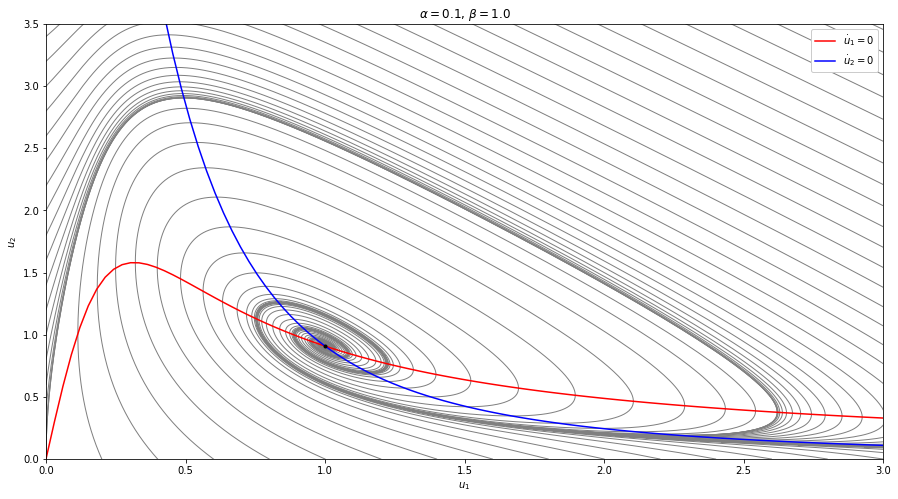

In [57]:
fig = plt.figure()
ax = plt.subplot()

ax.set_title(r'$\alpha={}$, $\beta={}$'.format(a, b))

x_max = 3
u_range = np.linspace(0, x_max, 100)

for solution in solutions:
    ax.plot(*solution, color='0.5', linewidth=1)
    
ax.plot(u_range, nullcline_1(u_range), color='r', label=r'$\dot{u}_1 = 0$')
ax.plot(u_range, nullcline_2(u_range), color='b', label=r'$\dot{u}_2 = 0$')

ax.plot(*fixpoint, marker='.', color='k')

ax.legend(framealpha=1, fancybox=True)
    
ax.set_xlabel(r'$u_1$')
ax.set_ylabel(r'$u_2$')

ax.set_xlim(0, x_max)
ax.set_ylim(0, 3.5)
    
fig.set_size_inches(15,8)
plt.show()

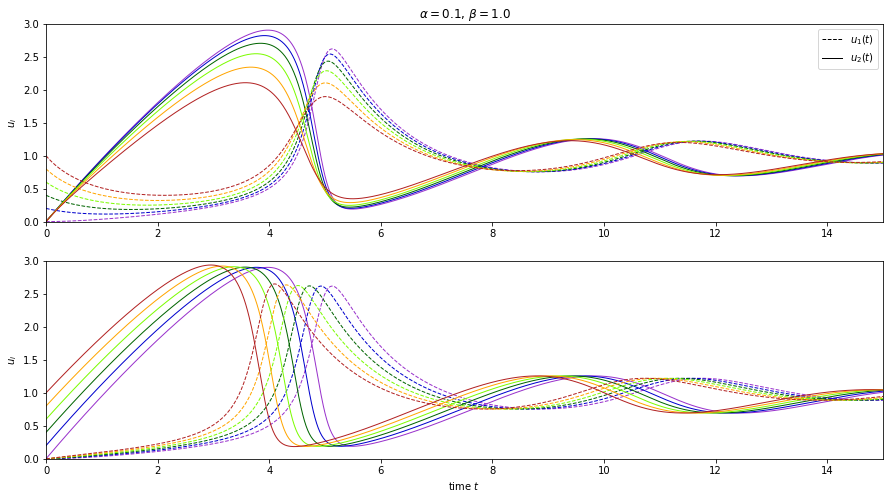

In [58]:
fig = plt.figure()
ax1 = plt.subplot2grid((2, 1), (0, 0))
ax2 = plt.subplot2grid((2 ,1), (1, 0))

ax1.set_title(r'$\alpha={}$, $\beta={}$'.format(a, b))

colors = ['darkorchid', 'mediumblue', 'darkgreen', 'lawngreen', 'orange', 'firebrick']

u1_example = plt.Line2D([0], [0], color='k', linewidth=1, linestyle='--')
u2_example = plt.Line2D([0], [0], color='k', linewidth=1, linestyle='-')

ax1.legend([u1_example, u2_example], [r'$u_1(t)$', r'$u_2(t)$'], fancybox=True)

for solution, c in zip(solutions[::2], colors):
    ax1.plot(t_range, solution[0], color=c, linewidth=1, linestyle='--')
    ax1.plot(t_range, solution[1], color=c, linewidth=1)
        
ax1.set_xlim(0, 15)
ax1.set_ylim(0, 3)
ax1.set_ylabel(r'$u_i$')

for solution, c in zip(solutions[1::2], colors):
    ax2.plot(t_range, solution[0], color=c, linewidth=1, linestyle='--')
    ax2.plot(t_range, solution[1], color=c, linewidth=1)
    
ax2.set_xlim(0, 15)
ax2.set_ylim(0, 3)
ax2.set_xlabel(r'time $t$')
ax2.set_ylabel(r'$u_i$')
    
fig.set_size_inches(15,8)
plt.show()